# Data Cleaning & EDA
---

# 1. Previewing Data

In [85]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [86]:
#import data
train = pd.read_csv('datasets/train.csv', keep_default_na=False, na_values=[''])
test = pd.read_csv('datasets/test.csv', keep_default_na=False, na_values=[''])

#adjust size of columns to display in preview
pd.options.display.max_columns = 99

#preview data
train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [87]:
train_size = train.shape
test_size = test.shape

print("Train Size: " + str(train_size))
print("Test Size: " + str(test_size))

Train Size: (2051, 81)
Test Size: (878, 80)


In [88]:
#Create a Data Dictionary
columns = []
data_types = []
unique_values = []
for col in train:
    columns.append(col)
    data_types.append(str(train[col].dtype))
    if col in ['Id','PID']:
        unique_values.append(' ')
    elif (train[col].dtype == object) or (col in ['MS SubClass','Overall Quality','Overall Cond']):
        unique_values.append(train[col].unique())
    else:
        max_val = train[col].max()
        min_val = train[col].min()
        avg_val = train[col].mean()
        med_val = train[col].median()
        desc = "min: "+ str(min_val) + " , avg: " + str(int(avg_val)) + " , med: " + str(int(med_val)) + " , max: " + str(int(max_val))
        unique_values.append(desc)
    
dd = pd.DataFrame.from_dict({'Name':columns, 'Data Type':data_types, 'Values': unique_values})

dd.head(5)

dd.to_csv("datasets/data_dict_train.csv",index=False)



# 2. Cleaning Data

## 2.1. Handling Missing Values

In [89]:
train.isnull().sum().sort_values(ascending=False).head(20)

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       4
BsmtFin Type 2      2
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cond         1
Bsmt Cond           1
BsmtFin Type 1      1
Garage Finish       1
Garage Cars         1
Garage Area         1
BsmtFin SF 2        1
Garage Qual         1
BsmtFin SF 1        1
Bsmt Qual           1
Total Bsmt SF       1
Bsmt Unf SF         1
dtype: int64

In [90]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

For **Masonry Veneer Type**, there is a **None** string value, we will use this to subsitute NAs for this column.

In [91]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna("None")
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)

Homese with no Garage should have a **Garage Year Built** value of NaN. It doesn't exist! Do we have a Garage with no Year Built?

In [92]:
train.loc[(train['Garage Yr Blt'].isnull()) & (train['Garage Type']!="NA")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [93]:
train[train['Garage Type']!="NA"][['Year Built','Year Remod/Add','Garage Yr Blt']].corr()

,Year Built,Year Remod/Add,Garage Yr Blt
Year Built,1.000000,0.649198,0.825316
Year Remod/Add,0.649198,1.000000,0.674024
Garage Yr Blt,0.825316,0.674024,1.000000


Most garages are probably built the same year the house was built. Looking at correlation matrix, Year Built & Garage Yr Blt show a high positive correlation. Let's set missing Garage Year Blts for homes with garages with the home Year Built.

In [94]:
train.loc[(train['Garage Yr Blt'].isnull()) & (train['Garage Type']!="NA"),'Garage Yr Blt'] = train.loc[(train['Garage Yr Blt'].isnull()) & (train['Garage Type']!="NA"),'Year Built']

In [95]:
train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
NA      54
Name: Bsmt Exposure, dtype: int64

In [96]:
train.loc[(train['Bsmt Exposure'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


In [97]:
train.loc[(train['Bsmt Exposure'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


Most homes with basements have **No** as Basement Exposure Value. Use the majority value to fill in the missing values.

In [98]:
train[train['Total Bsmt SF']>0]['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [99]:
train.loc[(train['Bsmt Exposure'].isnull()) & (train['Total Bsmt SF']>0),'Bsmt Exposure'] = "No"

There is one home missing basement information. Another home is missing garage information. Difficult to make inference, we will drop these rows from our training data set.

In [100]:
train[train['Total Bsmt SF'].isnull()][['Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 1','Bsmt Qual']]

,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,Bsmt Qual
1327,NaN,NaN,NaN,NaN


In [101]:
train[train['Garage Cars'].isnull()][['Garage Cars','Garage Area','Garage Finish','Garage Qual']]

,Garage Cars,Garage Area,Garage Finish,Garage Qual
1712,NaN,NaN,NaN,NaN


In [102]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0)
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna("NA")
train['Garage Qual'] = train['Garage Qual'].fillna("TA")
train['Garage Cond'] = train['Garage Cond'].fillna("TA")
train['Garage Finish'] = train['Garage Finish'].fillna("Unf")
#uses garage area mean for detatched garage (missing value garage type)
train['Garage Area'] = train['Garage Area'].fillna(365)

In [103]:
train.isnull().sum().sort_values(ascending=False).head(2)

Lot Frontage     330
Garage Yr Blt    113
dtype: int64

## 2.2. Checking Data Types

Convert Year data to **integer** type.

In [104]:
train[['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']].dtypes

Year Built          int64
Year Remod/Add      int64
Garage Yr Blt     float64
Yr Sold             int64
dtype: object

In [105]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0).astype(int)
train['Garage Yr Blt'].replace(0,None, inplace=True)

## 2.3. Apply data cleaning on testing data set

In [106]:
test.isnull().sum().sort_values(ascending=False).head(6)

Lot Frontage     160
Garage Yr Blt     45
Mas Vnr Area       1
Garage Finish      1
Electrical         1
Mas Vnr Type       1
dtype: int64

In [107]:
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna("None")
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)

## 2.4. Save Cleaned Datasets

In [108]:
train.to_csv("datasets/cleaned_train.csv",index=False)
test.to_csv("datasets/cleaned_test.csv",index=False)

# 3. EDA - Visualizations

First create lists of different attributes to explore sections of data at a time. Makes it easier to visualize 81 different columns!

In [109]:

size = ['Lot Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF',
'Garage Cars','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area',
       'Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr',
       'TotRms AbvGrd','Low Qual Fin SF','Mas Vnr Area','Lot Frontage']

age = ['Year Built','Year Sold','Year Remod/Add']

qc = ['Overall Qual','Overall Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Exter Qual','Exter Cond','Garage Qual',
     'Garage Cond']

loc = ['Neighborhood','MS Zoning']

garage = ['Garage Cars','Garage Area','Garage Qual','Garage Cond','Garage Type','Garage Yr Blt','Garage Finish']

roof = ['Roof Matl','Roof Style']

exterior = ['Exterior 1st','Exterior 2nd','Mas Vnr Type']

utilities = ['Heating','Heating QC','Central Air','Electrical']

structural = ['Foundation','Roof Type','Roof Matl','Bldg Type','House Style','MS SubClass']

land = ['Lot Area','Lot Shape','Land Contour','Lot Config']

## 3.1. Distribution - Sale Price
What does the distribution of housing sale price look like in Ames, Iowa? Is it normally distributed?

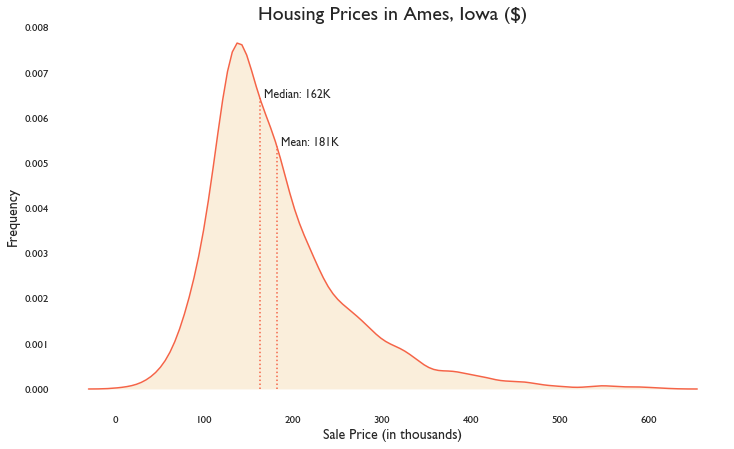

In [110]:
#Adapted from https://stackoverflow.com/questions/63307440/how-to-plot-a-mean-line-on-a-distplot-between-0-and-the-y-value-of-the-mean
sns.set(rc={'figure.figsize':(12,7),
            'figure.facecolor':'white',
            'axes.facecolor':'white'}, font= "Gill Sans")
fill = '#E8AB4E'
line_col = '#F56447'

x = train['SalePrice']/1000
p = sns.kdeplot(x, shade=False, color=line_col, legend=False)

kdeline = p.lines[0]
mean = x.mean()
q2 = np.quantile(x, 0.5)

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

p.vlines(mean, 0, height, color=line_col, ls=':')
p.vlines(q2, 0, np.interp(q2, xs, ys), color=line_col, ls=':')
p.fill_between(xs, 0, ys, facecolor=fill, alpha=0.2)
p.text(mean+5, height, "Mean: " + str(int(mean)) + "K")
p.text(q2+5, np.interp(q2, xs, ys)+0.00000001, "Median: " + str(int(q2)) + "K")

p.set_xlabel("Sale Price (in thousands)", fontsize = 14)
p.set_ylabel("Frequency", fontsize = 14)
p.set_title("Housing Prices in Ames, Iowa ($)", fontsize = 20);

#plt.savefig("images/SalesDistPlot.png", dpi=300)

Some expensive outliers (>300K) are skewing the data.

## 3.2. Correlations - Size

Exploring size attributes for houses and their correlation with sale price. 

Text(0, 0.5, 'Home Attribute')

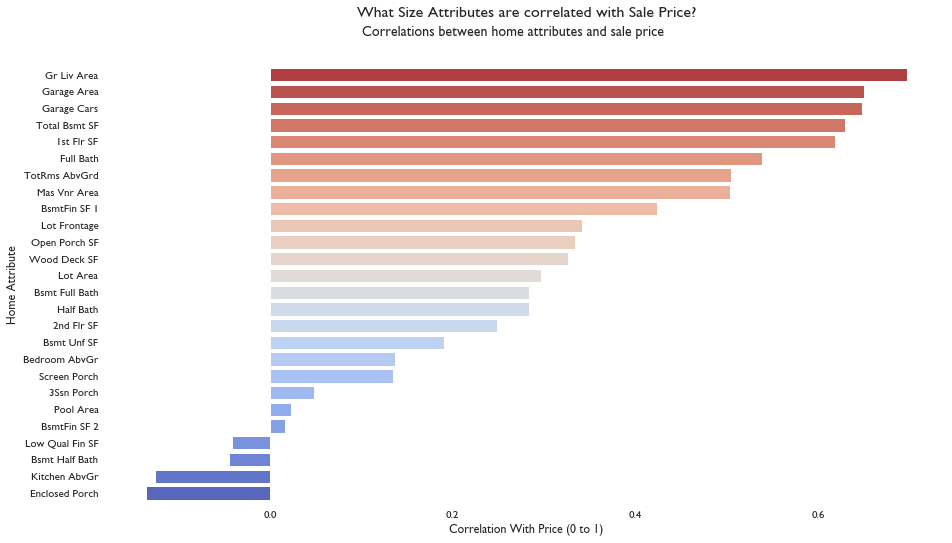

In [111]:
size_corr = pd.DataFrame(train[size + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False))
size_corr = size_corr[1:]

plt.figure(figsize=(15,8))
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'}, font= "Gill Sans")
plt.title('What Size Attributes are correlated with Sale Price?', fontsize=16, fontweight='bold', y =1.1)
plt.suptitle('Correlations between home attributes and sale price',fontsize=14, y=0.95)
sns.set_style("whitegrid")
ax = sns.barplot(x='SalePrice', y=size_corr.index, palette = "coolwarm_r", data=size_corr)
ax.set_xlabel('Correlation With Price (0 to 1)')
ax.set_ylabel('Home Attribute')

#plt.savefig("images/Size_Corr_Plot.png", dpi=300)

## 3.3. Colinearity - Size Attributes
Is there any colinearity among the top ranking size attribute correlations?

In [112]:
train[list(size_corr[0:10].index)].corr().style.background_gradient(cmap='coolwarm')

,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Full Bath,TotRms AbvGrd,Mas Vnr Area,BsmtFin SF 1,Lot Frontage
Gr Liv Area,1.000000,0.490706,0.486600,0.454245,0.562441,0.617323,0.813333,0.383875,0.215295,0.383856
Garage Area,0.490706,1.000000,0.893180,0.489133,0.498781,0.397990,0.341184,0.380520,0.331530,0.358585
Garage Cars,0.486600,0.893180,1.000000,0.433451,0.438981,0.467490,0.368034,0.356546,0.260676,0.297143
Total Bsmt SF,0.454245,0.489133,0.433451,1.000000,0.808351,0.326277,0.294787,0.403618,0.538999,0.354140
1st Flr SF,0.562441,0.498781,0.438981,0.808351,1.000000,0.367623,0.393254,0.386482,0.462198,0.463900
Full Bath,0.617323,0.397990,0.467490,0.326277,0.367623,1.000000,0.519630,0.232474,0.074982,0.152812
TotRms AbvGrd,0.813333,0.341184,0.368034,0.294787,0.393254,0.519630,1.000000,0.271657,0.055973,0.362704
Mas Vnr Area,0.383875,0.380520,0.356546,0.403618,0.386482,0.232474,0.271657,1.000000,0.318592,0.215464
BsmtFin SF 1,0.215295,0.331530,0.260676,0.538999,0.462198,0.074982,0.055973,0.318592,1.000000,0.214178
Lot Frontage,0.383856,0.358585,0.297143,0.354140,0.463900,0.152812,0.362704,0.215464,0.214178,1.000000


**Garage Area** and **Garage Cars** are highly correlated, we will only use one of the attributes in the data model. Both measure size of garage, we can suspect there is a natural relationship (potentially redundant). Since Garage Area has the stronger correlation with price we will use this and ignore Garage Cars.

**Total Rms AbvGrd** is highly correlated with **Gr Liv Area** (above ground living area). Both are measuring sizee for above ground, natural relationship. We can ignore Ttal Rms AbvGrd and use Gr Liv Area in our model

**1st Flr SF** and **Total Bsmt SF** are also highly correlated.

## 3.4. Correlations - Non Size Metrics

Text(0, 0.5, 'Home Attribute')

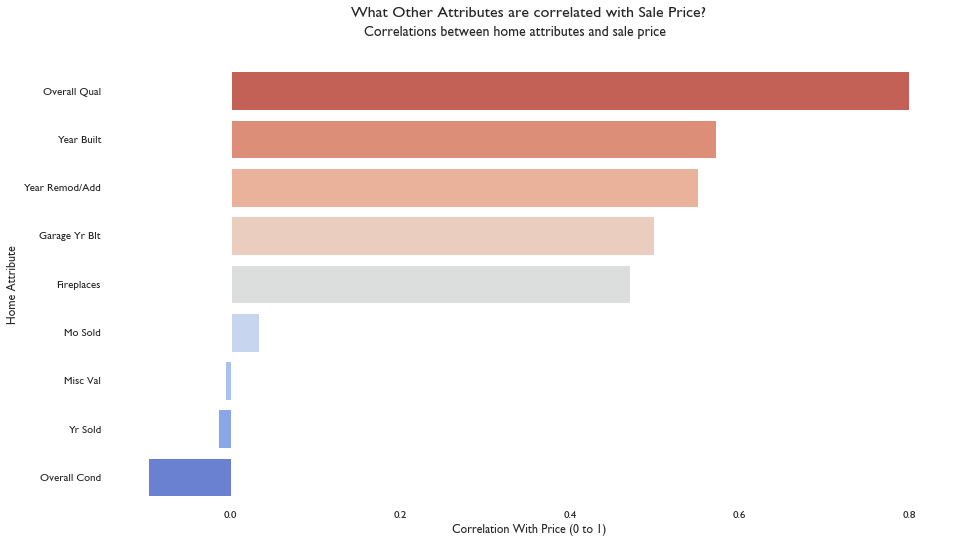

In [113]:
numeric_data = train.select_dtypes(include=[int,float])
non_size_numeric_cols = [col for col in numeric_data if col not in size]

non_size_numeric_cols.remove('Id')
non_size_numeric_cols.remove('PID')
non_size_numeric_cols.remove('MS SubClass')


non_size_corr = pd.DataFrame(train[non_size_numeric_cols].corr()['SalePrice'].sort_values(ascending=False))
non_size_corr = non_size_corr[1:]

plt.figure(figsize=(15,8))
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'}, font= "Gill Sans")
plt.title('What Other Attributes are correlated with Sale Price?', fontsize=16, fontweight='bold', y =1.1)
plt.suptitle('Correlations between home attributes and sale price',fontsize=14, y=0.95)
sns.set_style("whitegrid")
ax = sns.barplot(x='SalePrice', y=non_size_corr.index, palette = "coolwarm_r", data=non_size_corr)
ax.set_xlabel('Correlation With Price (0 to 1)')
ax.set_ylabel('Home Attribute')

#plt.savefig("images/NonSize_Corr_Plot.png", dpi=300)

## 3.5. Colinearity - Non Size Metrics

In [114]:
train[list(non_size_corr.index)].corr().style.background_gradient(cmap='coolwarm')

,Overall Qual,Year Built,Year Remod/Add,Garage Yr Blt,Fireplaces,Mo Sold,Misc Val,Yr Sold,Overall Cond
Overall Qual,1.000000,0.602964,0.584654,0.534722,0.388920,0.019242,0.022099,-0.011578,-0.082770
Year Built,0.602964,1.000000,0.629116,0.758650,0.168848,-0.007083,0.000626,-0.003559,-0.370988
Year Remod/Add,0.584654,0.629116,1.000000,0.623567,0.138858,0.011568,-0.001704,0.042744,0.042614
Garage Yr Blt,0.534722,0.758650,0.623567,1.000000,0.080414,0.014855,0.004779,0.002734,-0.297931
Fireplaces,0.388920,0.168848,0.138858,0.080414,1.000000,0.018228,0.023372,0.006887,-0.006463
Mo Sold,0.019242,-0.007083,0.011568,0.014855,0.018228,1.000000,0.019483,-0.147494,-0.003144
Misc Val,0.022099,0.000626,-0.001704,0.004779,0.023372,0.019483,1.000000,0.017269,0.014269
Yr Sold,-0.011578,-0.003559,0.042744,0.002734,0.006887,-0.147494,0.017269,1.000000,0.047664
Overall Cond,-0.082770,-0.370988,0.042614,-0.297931,-0.006463,-0.003144,0.014269,0.047664,1.000000


## 3.6.1. Visualizing Distribution - Size

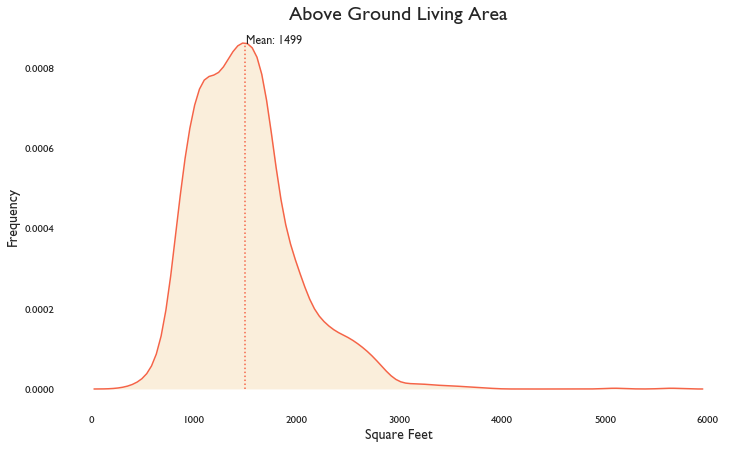

In [115]:
sns.set(rc={'figure.figsize':(12,7),
            'figure.facecolor':'white',
            'axes.facecolor':'white'}, font= "Gill Sans")
fill = '#E8AB4E'
line_col = '#F56447'

x = train['Gr Liv Area']
p = sns.kdeplot(x, shade=False, color=line_col, legend=False)

kdeline = p.lines[0]
mean = x.mean()

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

p.vlines(mean, 0, height, color=line_col, ls=':')
p.fill_between(xs, 0, ys, facecolor=fill, alpha=0.2)
p.text(mean+5, height, "Mean: " + str(int(mean)))

p.set_xlabel("Square Feet", fontsize = 14)
p.set_ylabel("Frequency", fontsize = 14)
p.set_title("Above Ground Living Area", fontsize = 20);

#plt.savefig("images/GrLivArea_Dist_Plot.png", dpi=300)

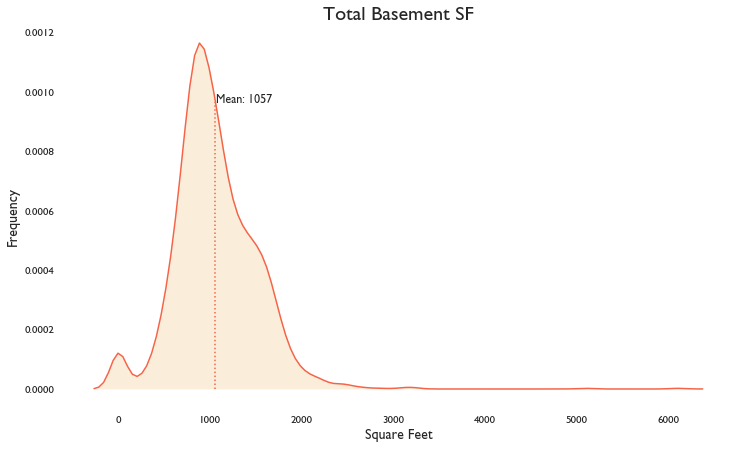

In [116]:
sns.set(rc={'figure.figsize':(12,7),
            'figure.facecolor':'white',
            'axes.facecolor':'white'}, font= "Gill Sans")
fill = '#E8AB4E'
line_col = '#F56447'

x = train['Total Bsmt SF']
p = sns.kdeplot(x, shade=False, color=line_col, legend=False)

kdeline = p.lines[0]
mean = x.mean()

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

p.vlines(mean, 0, height, color=line_col, ls=':')
p.fill_between(xs, 0, ys, facecolor=fill, alpha=0.2)
p.text(mean+5, height, "Mean: " + str(int(mean)))

p.set_xlabel("Square Feet", fontsize = 14)
p.set_ylabel("Frequency", fontsize = 14)
p.set_title("Total Basement SF", fontsize = 20);

#plt.savefig("images/TotalBsmtSF_Dist_Plot.png", dpi=300)

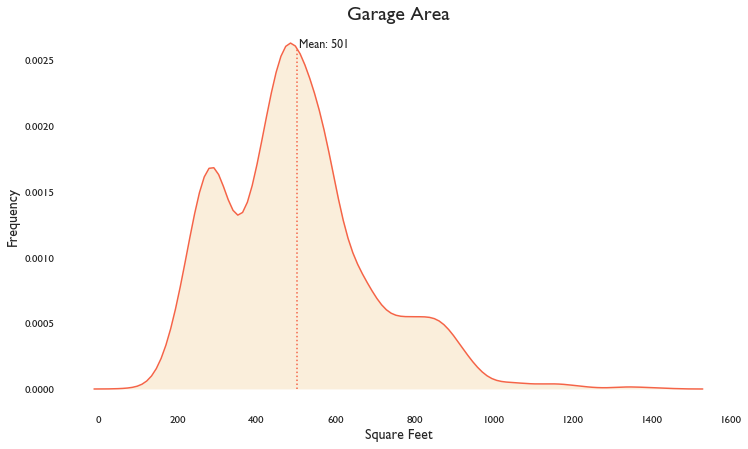

In [117]:
sns.set(rc={'figure.figsize':(12,7),
            'figure.facecolor':'white',
            'axes.facecolor':'white'}, font= "Gill Sans")
fill = '#E8AB4E'
line_col = '#F56447'

x = train[train['Garage Type']!="NA"]['Garage Area']
p = sns.kdeplot(x, shade=False, color=line_col, legend=False)

kdeline = p.lines[0]
mean = x.mean()

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

p.vlines(mean, 0, height, color=line_col, ls=':')
p.fill_between(xs, 0, ys, facecolor=fill, alpha=0.2)
p.text(mean+5, height, "Mean: " + str(int(mean)))

p.set_xlabel("Square Feet", fontsize = 14)
p.set_ylabel("Frequency", fontsize = 14)
p.set_title("Garage Area", fontsize = 20);

#plt.savefig("images/GarageArea_Dist_Plot.png", dpi=300)

## 3.6.2. Visualizing Distribution - Age/Year Built

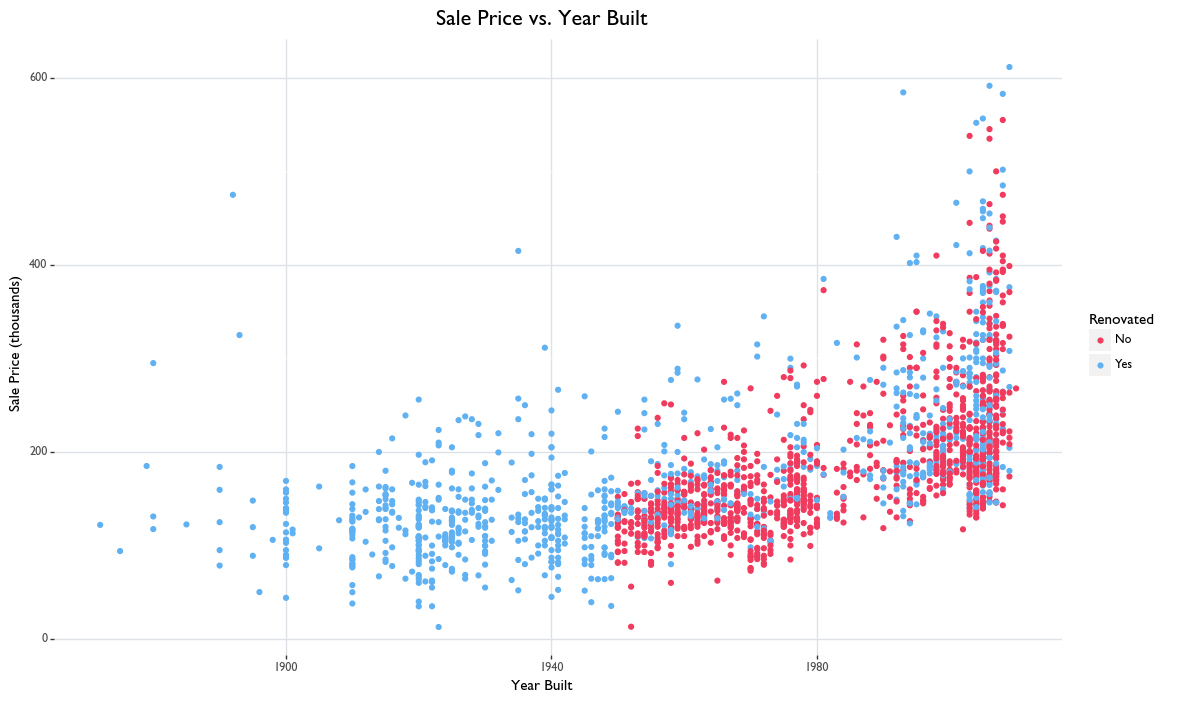

<ggplot: (8775881164927)>

In [118]:
train['Renovated'] = np.where(train['Year Built'] == train['Year Remod/Add'],"No","Yes")

age_plot = (
    ggplot(train, aes(x= "Year Built", y= "SalePrice/1000",color='Renovated'))
    + geom_point()
    + xlab("Year Built")
    + ylab("Sale Price (thousands)")
    + ggtitle("Sale Price vs. Year Built")
    + scale_color_manual(["#F03B5E","#60B1F2"])
    +theme(figure_size=(13, 8),
            text = element_text(family="Gill Sans"),
            plot_title=element_text(weight='bold',color='black', size=16),
            panel_background = element_rect(fill="white"),
            panel_grid_major = element_line(color="#dee2e6"),
            axis_title = element_text(weight='bold'))
)

age_plot

#ggsave(plot=age_plot, filename='images/YearPrice_Scatter.png', dpi=1000)

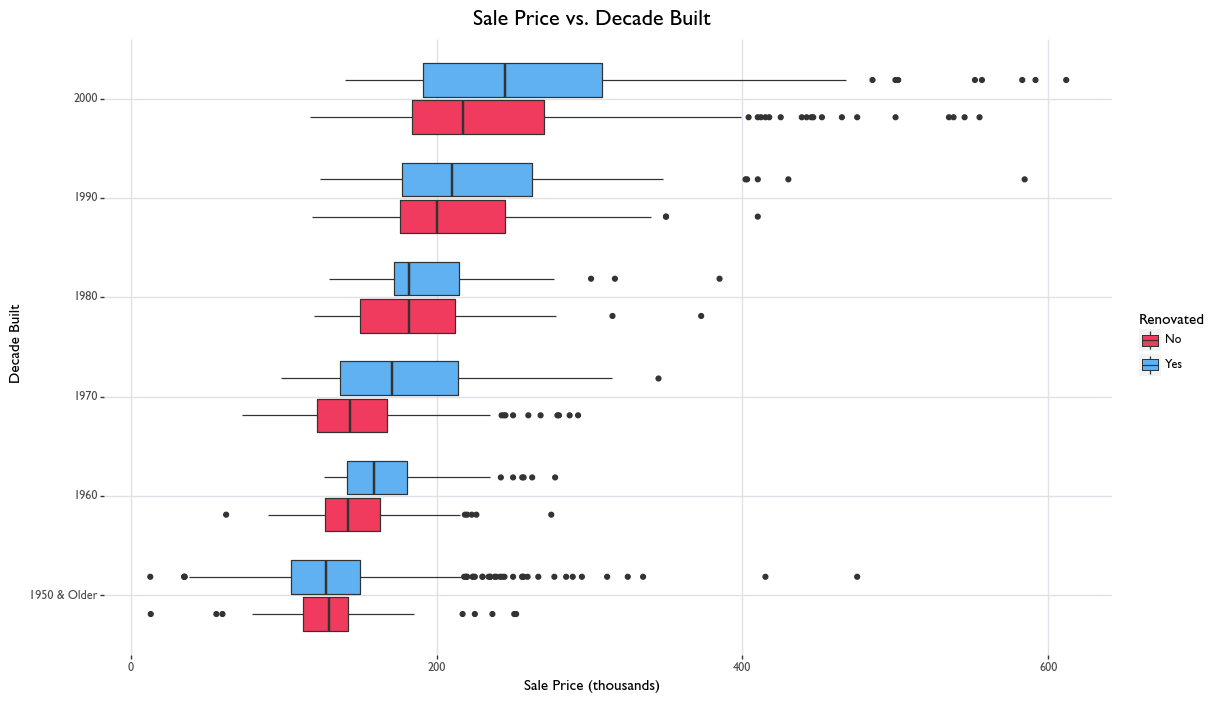

<ggplot: (8775880967819)>

In [119]:
train['Year Built Decade'] = (train['Year Built']//10)*10
train['Year Built Decade']= np.where(train['Year Built Decade']<1960,"1950 & Older",train['Year Built Decade'].astype(str))
#train['Year Built Decade']= train['Year Built Decade'].astype(str)

train[['Year Built','Year Built Decade']].head(4)

decade_df = train[train["Year Built"]<2010]


decade_plot = (
    ggplot(decade_df, aes(x= "Year Built Decade", y= "SalePrice/1000", fill="Renovated"))
    + geom_boxplot()
    + xlab("Decade Built")
    + ylab("Sale Price (thousands)")
    + ggtitle("Sale Price vs. Decade Built")
    + scale_fill_manual(["#F03B5E","#60B1F2"])
    + coord_flip()
    +theme(figure_size=(13, 8),
            text = element_text(family="Gill Sans"),
            plot_title=element_text(weight='bold',color='black', size=16),
            panel_background = element_rect(fill="white"),
            panel_grid_major = element_line(color="#dee2e6"),
            axis_title = element_text(weight='bold'))
)

decade_plot

#ggsave(plot=decade_plot, filename='images/YearDecadePrice_Box.png', dpi=1000)


## 3.7. Visualizing Distributions Categorical Values

In [120]:
#Function to facilitate plots for categorical features
#inspired by https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe
def plot_chart(df,x, order_list, fig):
    sns.set_style("darkgrid")
    sns.set(font= "Gill Sans")
    plt.subplot(2,2,fig)
    plt.title(x+' Distribution', fontsize = 20)
    sns.countplot(df[x],palette=("plasma"), order= order_list)
    plt.subplot(2,2,(fig+1))
    plt.title(x+' vs. Sale Price', fontsize = 20)
    sns.boxplot(y=df[x], x=df['SalePrice'], palette=("plasma"), order=order_list)
    

### 3.7.1. Quality & Condition Measurements

### Overall Quality

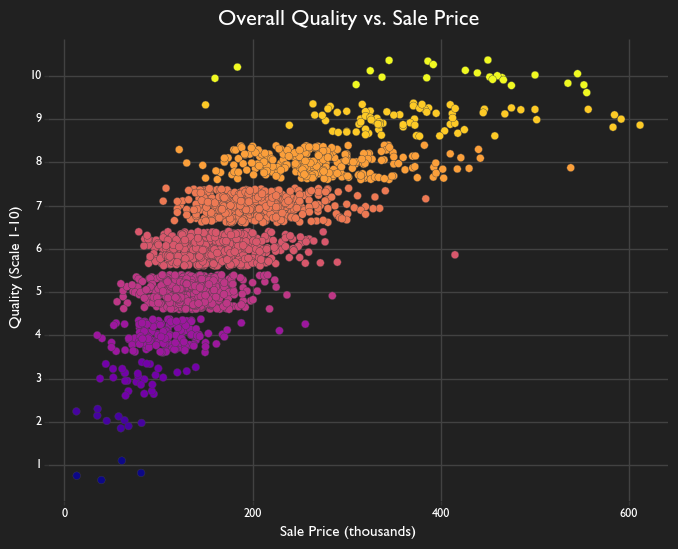

<ggplot: (8775883923722)>

In [121]:
qual_plot = (
    ggplot(train, aes(x= "Overall Qual", y= "SalePrice/1000", fill="Overall Qual"))
    + geom_jitter(color="#424242", size=3, stroke=0.15)
    + scale_x_continuous(breaks=[1,2,3,4,5,6,7,8,9,10])
    + xlab("Quality (Scale 1-10)")
    + ylab("Sale Price (thousands)")
    + ggtitle("Overall Quality vs. Sale Price")
    + coord_flip()
    + scale_fill_cmap(cmap_name="plasma")
    +theme(figure_size=(8, 6),
            legend_position = "none",
            text = element_text(family="Gill Sans", color="white"),
            legend_background = element_rect(fill='#212121'),
            plot_title=element_text(weight='bold',color='white', size=16),
            panel_background = element_rect(fill="#212121", color='#212121'),
            plot_background = element_rect(fill="#212121",  color='#212121'),
            panel_grid_major = element_line(color="#424242"),
            panel_grid_minor = element_blank(),
            axis_title = element_text(weight='bold'))
)

qual_plot

#ggsave(plot=qual_plot, filename='images/OverallQual_Jitter.png', dpi=1000)

In [122]:
### Overall Condition

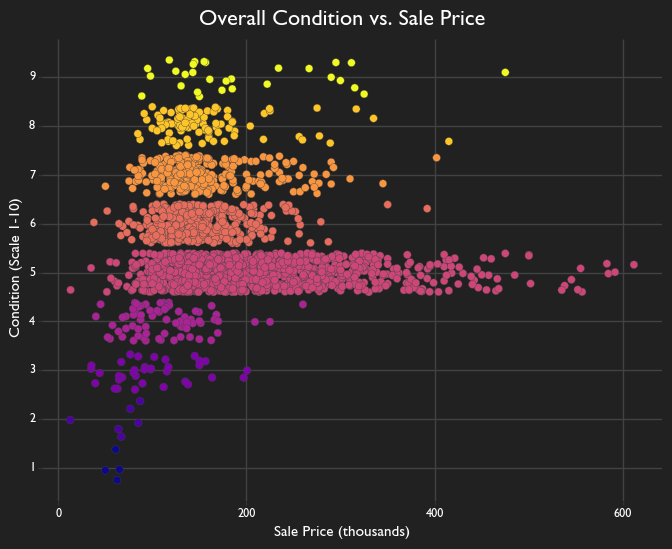

<ggplot: (8775885070270)>

In [123]:
cond_plot = (
    ggplot(train, aes(x= "Overall Cond", y= "SalePrice/1000", fill="Overall Cond"))
    + geom_jitter(color="#424242", size=3, stroke=0.15)
    + scale_x_continuous(breaks=[1,2,3,4,5,6,7,8,9,10])
    + xlab("Condition (Scale 1-10)")
    + ylab("Sale Price (thousands)")
    + ggtitle("Overall Condition vs. Sale Price")
    + coord_flip()
    + scale_fill_cmap(cmap_name="plasma")
    +theme(figure_size=(8, 6),
            legend_position = "none",
            text = element_text(family="Gill Sans", color="white"),
            legend_background = element_rect(fill='#212121'),
            plot_title=element_text(weight='bold',color='white', size=16),
            panel_background = element_rect(fill="#212121", color='#212121'),
            plot_background = element_rect(fill="#212121",  color='#212121'),
            panel_grid_major = element_line(color="#424242"),
            panel_grid_minor = element_blank(),
            axis_title = element_text(weight='bold'))
)

cond_plot

#ggsave(plot=qual_plot, filename='images/OverallCond_Jitter.png', dpi=1000)

### Kitchen & Heating Quality

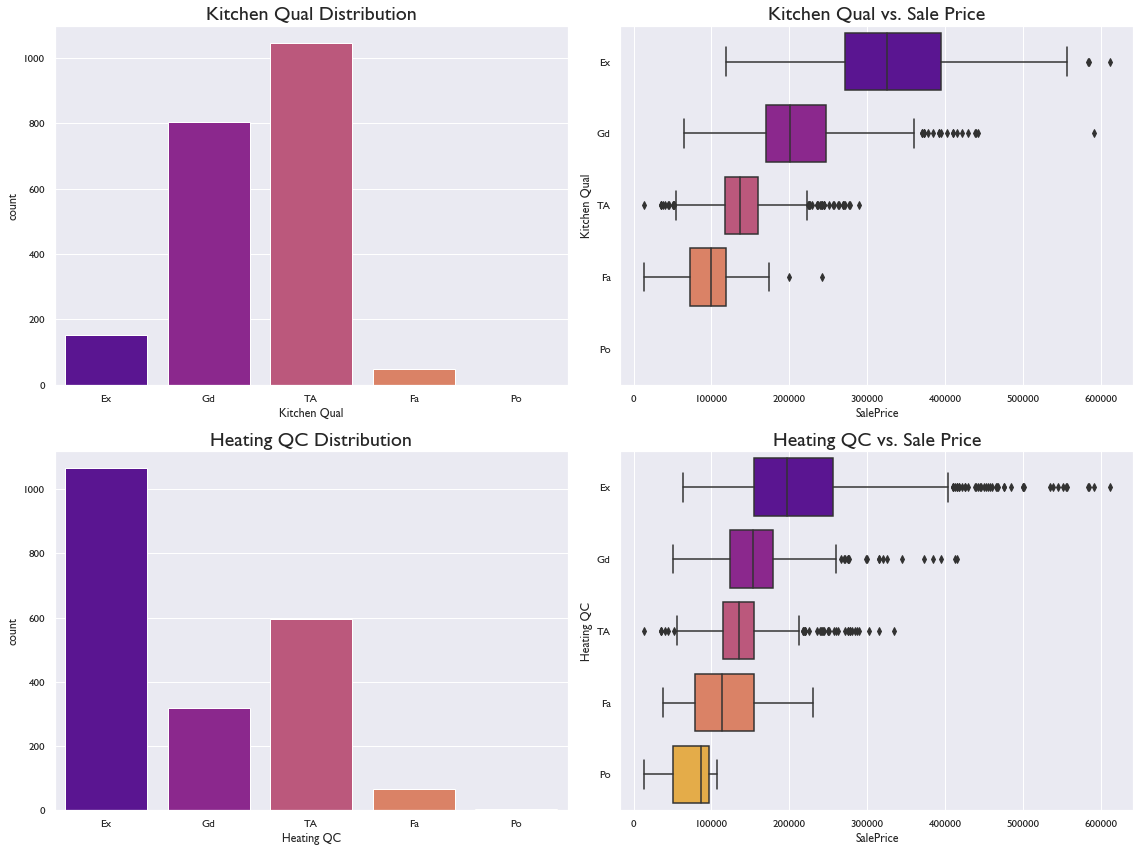

In [124]:
plt.figure(figsize=(16,12))

plot_chart(train, 'Kitchen Qual',['Ex','Gd','TA','Fa','Po'], 1)
plot_chart(train, 'Heating QC', ['Ex','Gd','TA','Fa','Po'], 3)

plt.tight_layout()


#plt.savefig("images/Qual_Kitchen_Heating_Box_Plot.png", dpi=300)

#### Basement and Garage Quality

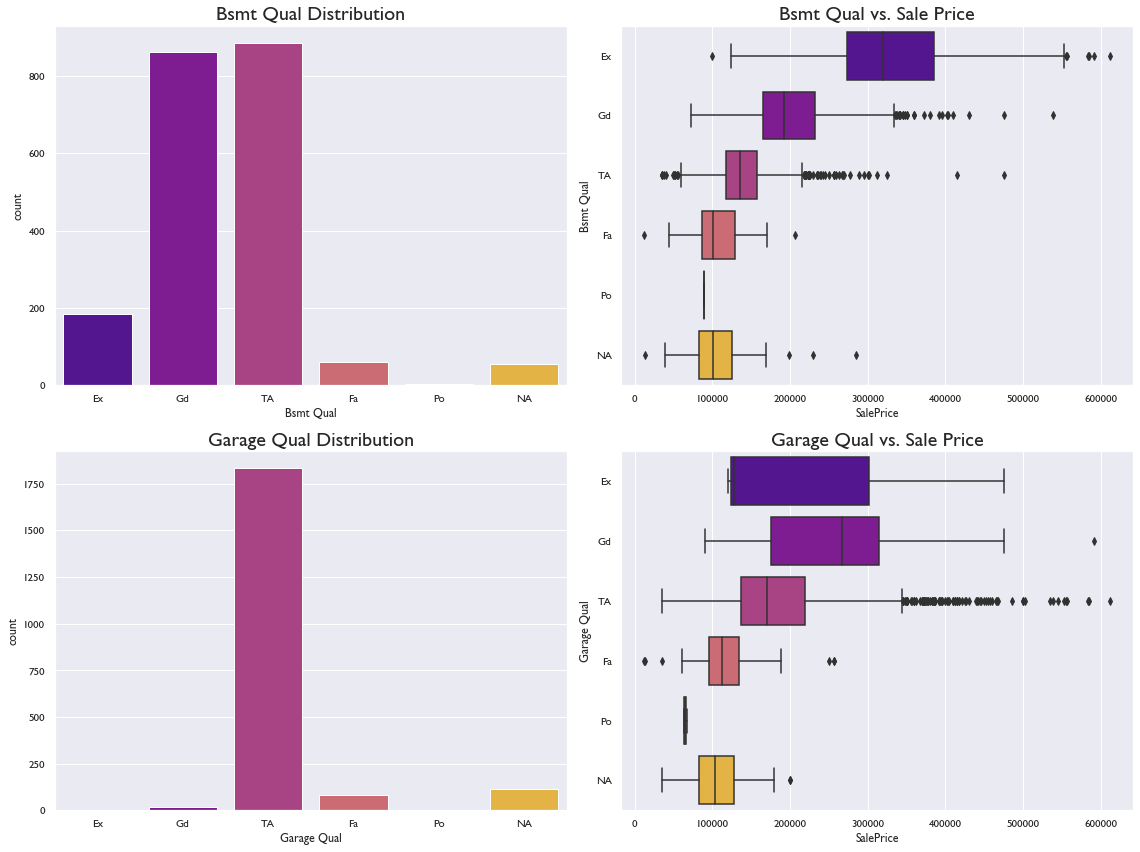

In [125]:
plt.figure(figsize=(16,12))

plot_chart(train, 'Bsmt Qual',['Ex','Gd','TA','Fa','Po','NA'], 1)
plot_chart(train, 'Garage Qual', ['Ex','Gd','TA','Fa','Po','NA'], 3)

plt.tight_layout()
#plt.savefig("images/Qual_Bsmt_Garage_Box_Plot.png", dpi=300)

### Other Categorical Variables 

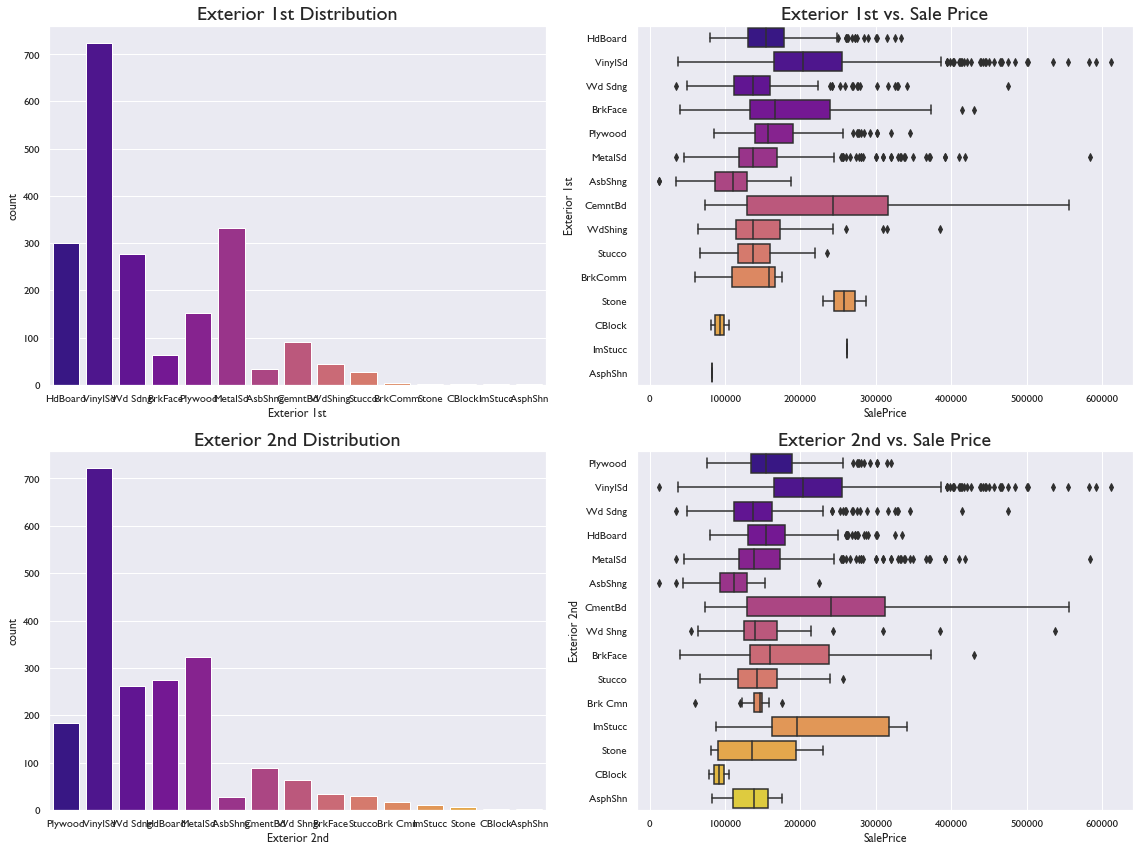

In [126]:
plt.figure(figsize=(16,12))

plot_chart(train, 'Exterior 1st', None, 1)
plot_chart(train, 'Exterior 2nd', None, 3)

plt.tight_layout()
#plt.savefig("images/Qual_Bsmt_Garage_Box_Plot.png", dpi=300)

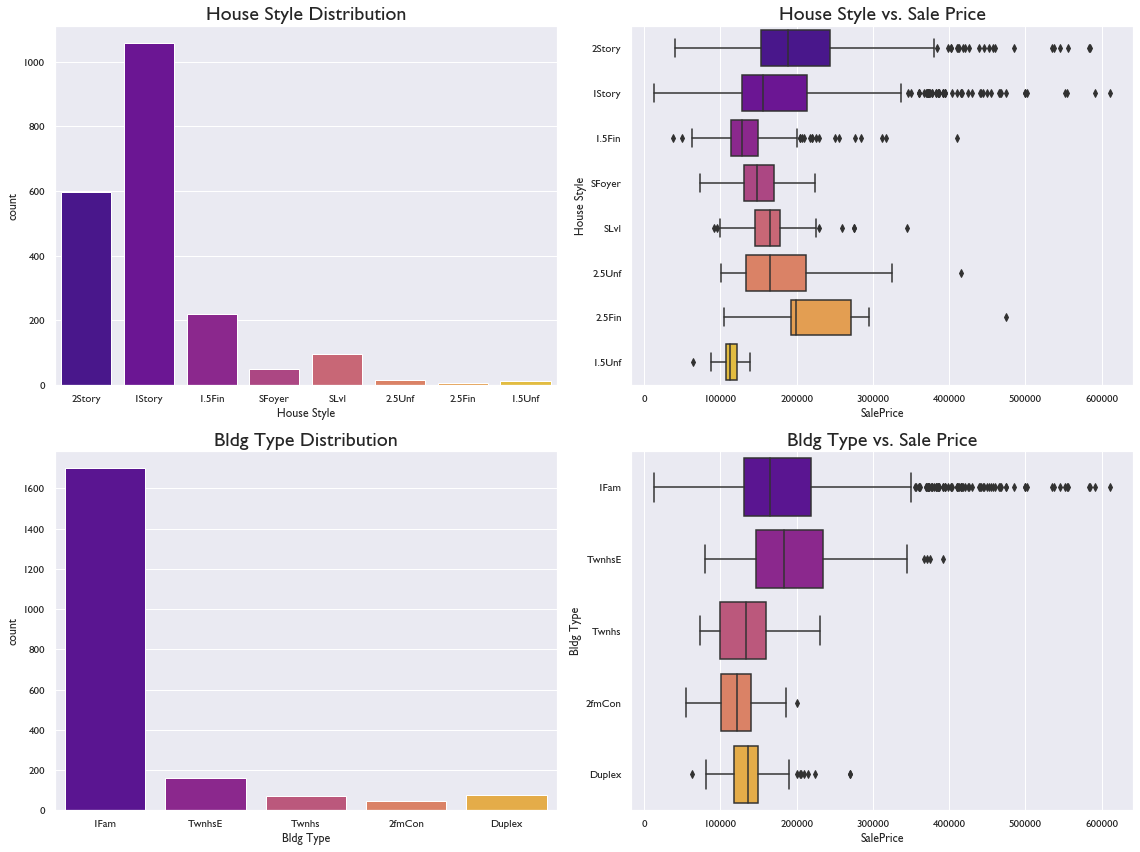

In [127]:
plt.figure(figsize=(16,12))

plot_chart(train, 'House Style', None, 1)
plot_chart(train, 'Bldg Type', None, 3)

plt.tight_layout()
#plt.savefig("images/House_Bldg_Type.png", dpi=300)

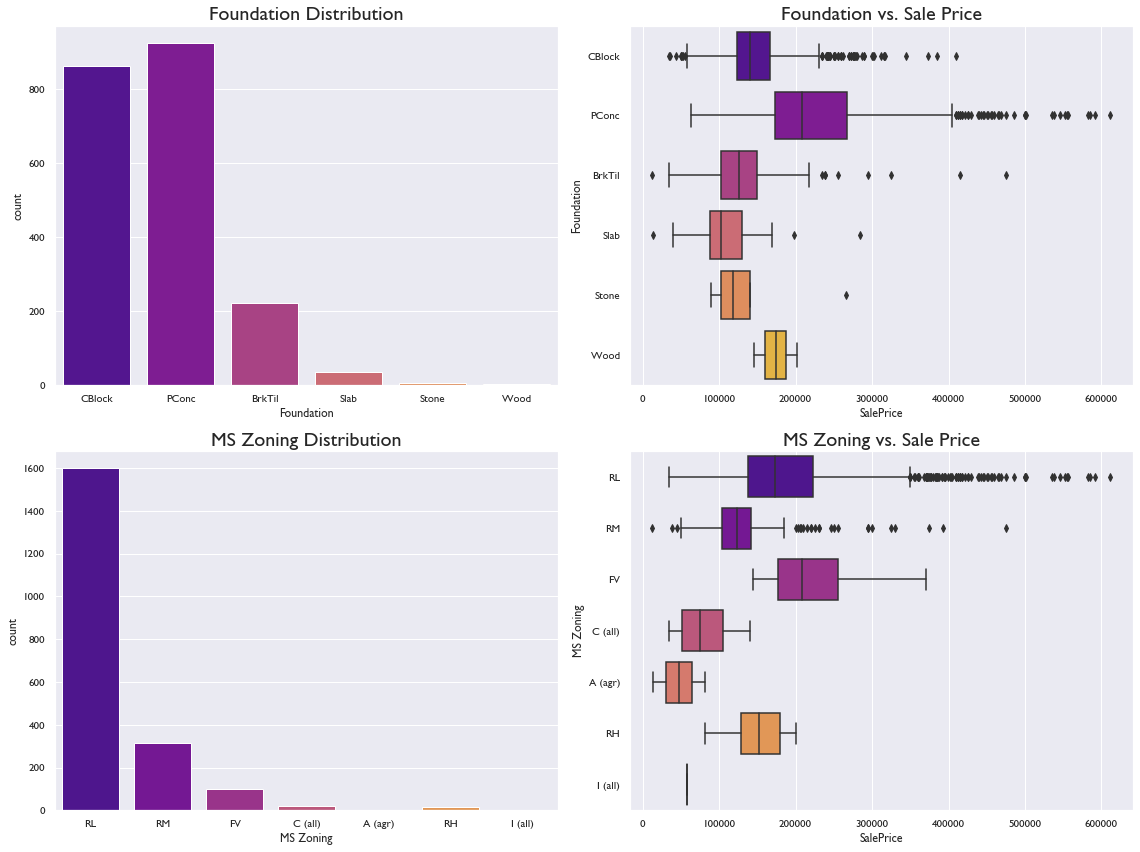

In [128]:
plt.figure(figsize=(16,12))

plot_chart(train, 'Foundation', None, 1)
plot_chart(train, 'MS Zoning', None, 3)

plt.tight_layout()
#plt.savefig("images/Found_MSZone_Box_Plot.png", dpi=300)

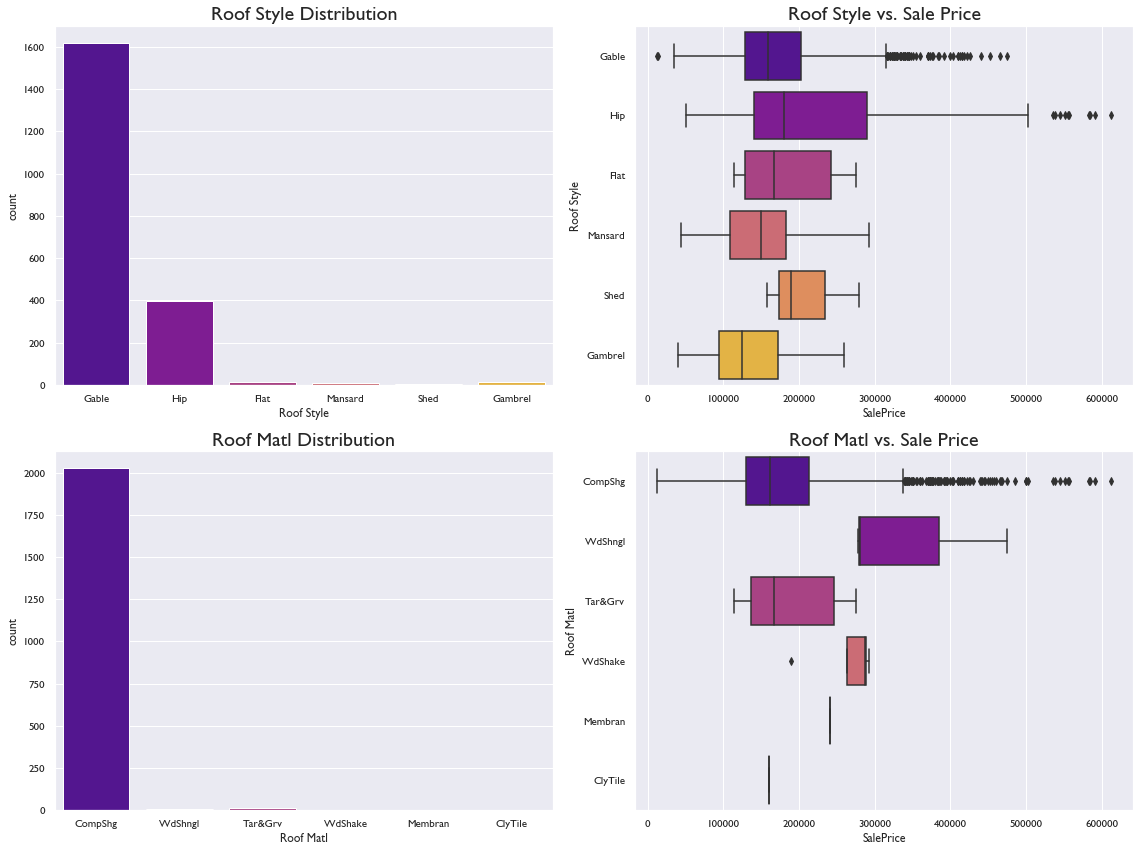

In [129]:
plt.figure(figsize=(16,12))

plot_chart(train, 'Roof Style', None, 1)
plot_chart(train, 'Roof Matl', None, 3)

plt.tight_layout()
#plt.savefig("images/Roof_Box_Plot.png", dpi=300)